# Importing Libraries

In [11]:
! pip install opencv-python

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import cv2
import os

In [13]:
np.random.seed(42)
tf.random.set_seed(42)

# Loading and preprocessing data

In [14]:
data_dir = "C:/Data Science/data science project/rice-leaf-disease-detection/rice_leaf_diseases_data"  
img_height, img_width = 128, 128
batch_size = 32

# Data augmentation for training data

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [16]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 96 images belonging to 3 classes.


In [17]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 24 images belonging to 3 classes.


# Inference: The ImageDataGenerator applies data augmentation and prepares the dataset for training.

# Building the CNN model

In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])


c:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Inference: The CNN model has convolutional, pooling, dropout, and dense layers for feature extraction and classification.


# Compiling the model

In [19]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Inference: Adam optimizer and categorical crossentropy are suitable for multi-class classification.

# Training the model

In [20]:
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


c:\Users\PC\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3424 - loss: 1.2425 - val_accuracy: 0.3333 - val_loss: 1.1594
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3893 - loss: 1.1096 - val_accuracy: 0.3333 - val_loss: 1.0775
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3841 - loss: 1.0901 - val_accuracy: 0.5000 - val_loss: 1.0643
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3776 - loss: 1.0917 - val_accuracy: 0.5417 - val_loss: 1.0375
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4688 - loss: 1.0694 - val_accuracy: 0.6250 - val_loss: 0.9698
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4375 - loss: 1.0480 - val_accuracy: 0.3750 - val_loss: 1.0417
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5039 - loss: 1.0382 - val_accuracy: 0.4583 - val_loss: 0.9715
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4688 - loss: 1.0145 - val_accuracy: 0.4583 - val_loss: 0.9595
Epoch 9/20
3/3 ━

# Inference: The model is trained for 20 epochs, with validation data used to monitor performance.

# Evaluating the model

In [21]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step - accuracy: 0.6250 - loss: 1.2722
Validation Loss: 1.272249698638916, Validation Accuracy: 0.625


# Inference: Validation metrics provide an unbiased evaluation of the model's performance.

# Generating classification report

In [22]:
validation_generator.reset()
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


In [23]:
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator.class_indices.keys())))

                       precision    recall  f1-score   support

Bacterial leaf blight       0.42      0.62      0.50         8
           Brown spot       0.50      0.12      0.20         8
            Leaf smut       0.30      0.38      0.33         8

             accuracy                           0.38        24
            macro avg       0.41      0.38      0.34        24
         weighted avg       0.41      0.38      0.34        24



# Inference: The classification report gives precision, recall, and F1-score for each class.

# Visualizing training results

In [24]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# Accuracy plot

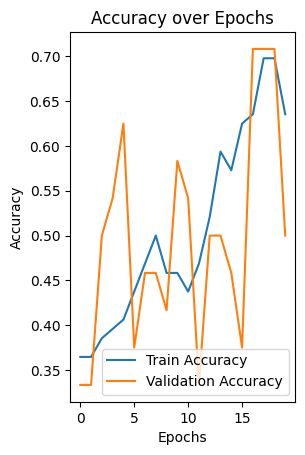

In [25]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot

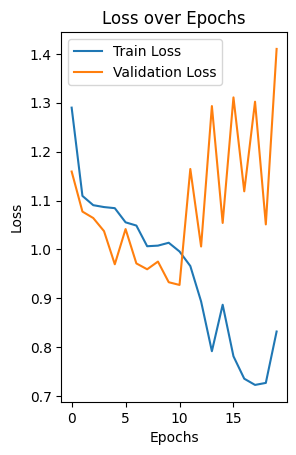

In [26]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Inference: Training and validation accuracy/loss trends help identify overfitting or underfitting.

# Saving the model

In [27]:
model.save("leaf_disease_cnn_model.h5")

# Inference: The model is saved for future use without retraining.

# Example usage of the trained model

In [28]:
from tensorflow.keras.preprocessing import image
img_path = "C:/Data Science/data science project/rice-leaf-disease-detection/test data/images_1.jpg"  
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [29]:
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted class: {list(train_generator.class_indices.keys())[predicted_class[0]]}")

Predicted class: Leaf smut


# Inference: The trained model can classify new leaf images and predict the disease category.

# Ultralytics Package

In [40]:
! pip install ultralytics

In [31]:
from ultralytics import YOLO


image 1/1 C:\Data Science\data science project\rice-leaf-disease-detection\test data\img_3.jpg: 384x640 1 vase, 174.9ms
Speed: 0.7ms preprocess, 174.9ms inference, 10.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to c:\Users\PC\runs\detect\predict5


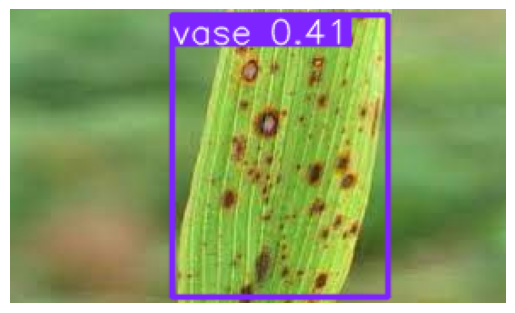

In [ ]:

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  

# Predict on the image
results = model.predict(
    task='detect',  
    source='C:/Data Science/data science project/rice-leaf-disease-detection/test data/img_3.jpg',
    save=True 
)

# Display results 
for result in results:
    result.plot()
    annotated_img = result.plot()  
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [37]:
for result in results:
    print(result.boxes.xyxy)  
    print(result.boxes.conf)  
    print(result.boxes.cls) 

tensor([[ 95.6697,   3.2395, 222.6581, 169.8405]])
tensor([0.4150])
tensor([75.])


100%|██████████| 5.59M/5.59M [00:02<00:00, 2.42MB/s]



image 1/1 C:\Data Science\data science project\rice-leaf-disease-detection\test data\img_3.jpg: 384x640 1 bird, 221.4ms
Speed: 6.0ms preprocess, 221.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to c:\Users\PC\runs\detect\predict6


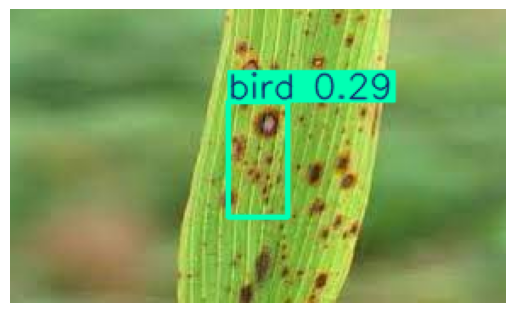

Bounding Boxes: tensor([[128.7422,  54.9735, 163.9420, 122.8862]])
Confidence Scores: tensor([0.2905])
Class Indices: tensor([14.])


In [38]:
model = YOLO('yolov10n.pt')  

# Predict on the image
results = model.predict(
    task='detect',  
    source='C:/Data Science/data science project/rice-leaf-disease-detection/test data/img_3.jpg',
    save=True  
)

# Display results
for result in results:
    
    annotated_img = result.plot()  
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Print detection details
    print("Bounding Boxes:", result.boxes.xyxy) 
    print("Confidence Scores:", result.boxes.conf) 
    print("Class Indices:", result.boxes.cls)